# Regressão Polinomial

O objetivo deste exercício é se aprofundar nos conceitos de regressão e implementar os algoritmos de regressão polinomial.

Utilizaremos as mesmas bases de dados do exercício anterior:

In [1]:
import pandas as pd

dados_por = pd.read_csv('data/Portland_housePrices.csv', index_col=None)

X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

Vamos examinar o comportamento do preço versus o tamanho do imóvel

Text(0, 0.5, 'Preço (USD$)')

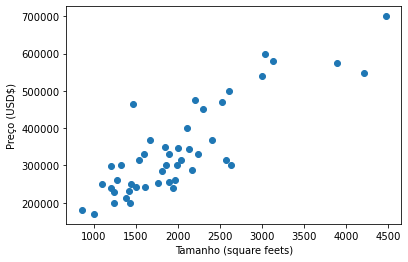

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.xlabel("Tamanho (square feets)")
plt.ylabel("Preço (USD$)")

## Medindo a falta de capacidade de generalização de modelos de alto grau

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Vamos agora encaixar uma regressão linear simples

In [6]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression().fit(X_train, y_train)

Vamos analizar o valor de $R^2$ na partição de treino e de teste

In [7]:
from sklearn.metrics import r2_score
print(f"Partição de Treino: {regression.score(X_train, y_train)}")
y_pred = regression.predict(X_test)
print(f"Partição de Teste: {r2_score(y_pred, y_test)}")

Partição de Treino: 0.6493635022333737
Partição de Teste: 0.39301821331700204


In [8]:
from sklearn.metrics import mean_squared_error

y_pred = regression.predict(X_test)

print(mean_squared_error(y_test, y_pred))

8380417681.328084


Agora vamos fazer a expansão polinomial de ordem 2

In [9]:
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)

E agora retreinamos o modelo utilizando o `X_poly` expandido e avaliamos a qualidade do mesmo.

In [10]:
regression2 = LinearRegression().fit(X_train, y_train)
print(f"Partição de Treino: {regression2.score(X_train, y_train)}")

y_pred = regression2.predict(X_test)
print(f"Partição de Teste: {r2_score(y_pred, y_test)}")

Partição de Treino: 0.6564211353485666
Partição de Teste: 0.278347829094135


Não notamos nenhuma melhora significativa no $R^2$ na partição de treino, no entanto notamos uma queda no desempenho na partição de teste.

## Exercício 1 

Avalie a qualidade do modelo nos conjunto de treino e de teste enquanto o grau do polinômio aumenta, utilizando a base Portland.

#### Importando bibliotecas

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

#### Lendo base de dados

In [11]:
dados_por = pd.read_csv('data/Portland_housePrices.csv', index_col=None)

X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

#### GRAU 3

In [12]:
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)

In [13]:
regression2 = LinearRegression().fit(X_train, y_train)
print(f"Partição de Treino: {regression2.score(X_train, y_train)}")

y_pred = regression2.predict(X_test)
print(f"Partição de Teste: {r2_score(y_pred, y_test)}")

Partição de Treino: 0.6569909895776398
Partição de Teste: 0.29828490472428015


#### GRAU 4

In [14]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)

In [15]:
regression2 = LinearRegression().fit(X_train, y_train)
print(f"Partição de Treino: {regression2.score(X_train, y_train)}")

y_pred = regression2.predict(X_test)
print(f"Partição de Teste: {r2_score(y_pred, y_test)}")

Partição de Treino: 0.6589590917221796
Partição de Teste: 0.25855494666436674


#### GRAU 5

In [16]:
poly = PolynomialFeatures(degree = 5)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)

In [17]:
regression2 = LinearRegression().fit(X_train, y_train)
print(f"Partição de Treino: {regression2.score(X_train, y_train)}")

y_pred = regression2.predict(X_test)
print(f"Partição de Teste: {r2_score(y_pred, y_test)}")

Partição de Treino: 0.6626529223268033
Partição de Teste: 0.2784732500146426


#### GRAU 6

In [18]:
poly = PolynomialFeatures(degree = 6)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)

In [19]:
regression2 = LinearRegression().fit(X_train, y_train)
print(f"Partição de Treino: {regression2.score(X_train, y_train)}")

y_pred = regression2.predict(X_test)
print(f"Partição de Teste: {r2_score(y_pred, y_test)}")

Partição de Treino: 0.6678899322620004
Partição de Teste: 0.23261215792387413


## Exercício 2

Utilizando o dataset de vendas de abóboras na cidade de Nova Iorque, compare uma regressão linear com regressões polinomiais.

In [21]:
nyc_pumpkins = pd.read_csv("data/nyc_pumpkins.csv")

X = nyc_pumpkins.loc[:,['size']]
y = nyc_pumpkins.loc[:,['price']]

Text(0, 0.5, 'Price (USD$)')

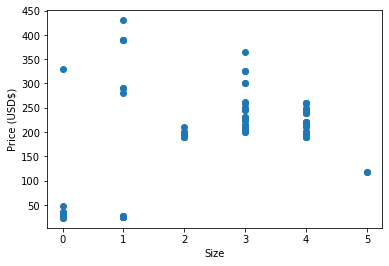

In [22]:
plt.scatter(X,y)
plt.xlabel("Size")
plt.ylabel("Price (USD$)")

#### Regressão Linear

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
regression = LinearRegression().fit(X_train, y_train)
print(f"Partição de Treino: {regression.score(X_train, y_train)}")
y_pred = regression.predict(X_test)
print(f"Partição de Teste: {r2_score(y_pred, y_test)}")

Partição de Treino: 0.25775331340249175
Partição de Teste: -0.615404746065505


In [25]:
y_pred = regression.predict(X_test)

print(mean_squared_error(y_test, y_pred))

5404.701413186553


#### Regressão Polinomial

In [26]:
X = nyc_pumpkins.loc[:,['size']]
y = nyc_pumpkins.loc[:,['price']]

In [27]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)

In [28]:
regression2 = LinearRegression().fit(X_train, y_train)
print(f"Partição de Treino: {regression2.score(X_train, y_train)}")

y_pred = regression2.predict(X_test)
print(f"Partição de Teste: {r2_score(y_pred, y_test)}")

Partição de Treino: 0.4152177217826164
Partição de Teste: 0.2193225847273521
